In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
FILE_PATH= "gpa.xlsx"
df = pd.read_excel(FILE_PATH)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
df ## Display dataframe

,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Overall,Last
0,Business Administration,Male,4.17,4.84,15000,Village,3,4.0,0,100,No,3,Yes,6th,3.907,3.220
1,Business Administration,Female,4.92,5.00,39000,City,3,1.0,240,80,No,3,Yes,7th,2.415,3.467
2,Business Administration,Male,5.00,4.83,29000,Village,3,0.0,270,90,No,4,Yes,3rd,2.179,4.000
3,Business Administration,Male,4.00,4.50,100000,City,5,4.5,180,100,No,5,Yes,4th,2.908,3.800
4,Business Administration,Female,2.19,3.17,24000,Village,3,0.0,180,100,No,3,Yes,4th,2.469,3.940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Public Health,Male,3.50,4.00,30000,Village,2,6.0,120,50,Yes,2,Yes,7th,3.622,3.250
489,Public Health,Male,4.50,4.00,43000,City,4,3.0,120,70,No,3,Yes,9th,3.656,3.500
490,Sociology,Female,4.56,3.67,21000,City,3,0.0,180,50,No,2,No,2nd,3.451,3.560
491,Sociology,Male,4.23,4.50,13000,Village,3,3.0,150,80,No,3,Yes,10th,3.154,3.610


In [3]:
col_y='Overall'
y=df[col_y]
col_irrelevant=[col_y,'Department', 'Semester']
X=df.drop(col_irrelevant, axis=1)
X=pd.get_dummies(X, drop_first=True)
X 


,HSC,SSC,Income,Computer,Preparation,Gaming,Attendance,English,Last,Gender_Male,Hometown_Village,Job_Yes,Extra_Yes
0,4.17,4.84,15000,3,4.0,0,100,3,3.220,True,True,False,True
1,4.92,5.00,39000,3,1.0,240,80,3,3.467,False,False,False,True
2,5.00,4.83,29000,3,0.0,270,90,4,4.000,True,True,False,True
3,4.00,4.50,100000,5,4.5,180,100,5,3.800,True,False,False,True
4,2.19,3.17,24000,3,0.0,180,100,3,3.940,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,3.50,4.00,30000,2,6.0,120,50,2,3.250,True,True,True,True
489,4.50,4.00,43000,4,3.0,120,70,3,3.500,True,False,False,True
490,4.56,3.67,21000,3,0.0,180,50,2,3.560,False,False,False,False
491,4.23,4.50,13000,3,3.0,150,80,3,3.610,True,True,False,True


In [4]:
from sklearn.model_selection import train_test_split
test_size = 0.3
random_state = 2025
X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size=test_size, random_state=random_state)




In [5]:
from sklearn.linear_model import LinearRegression
linr=LinearRegression(fit_intercept=True)
linr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Department   493 non-null    object 
 1   Gender       493 non-null    object 
 2   HSC          493 non-null    float64
 3   SSC          493 non-null    float64
 4   Income       493 non-null    int64  
 5   Hometown     493 non-null    object 
 6   Computer     493 non-null    int64  
 7   Preparation  493 non-null    float64
 8   Gaming       493 non-null    int64  
 9   Attendance   493 non-null    int64  
 10  Job          493 non-null    object 
 11  English      493 non-null    int64  
 12  Extra        493 non-null    object 
 13  Semester     493 non-null    object 
 14  Overall      493 non-null    float64
 15  Last         493 non-null    float64
dtypes: float64(5), int64(5), object(6)
memory usage: 61.8+ KB


In [7]:
df.isna().sum()


Department     0
Gender         0
HSC            0
SSC            0
Income         0
Hometown       0
Computer       0
Preparation    0
Gaming         0
Attendance     0
Job            0
English        0
Extra          0
Semester       0
Overall        0
Last           0
dtype: int64

In [9]:
df.describe(include='all')

,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Overall,Last
count,493,493,493.000000,493.000000,493.000000,493,493.000000,493.000000,493.000000,493.000000,493,493.000000,493,493,493.000000,493.000000
unique,10,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,2,11,NaN,NaN
top,Computer Science and Engineering,Male,NaN,NaN,NaN,Village,NaN,NaN,NaN,NaN,No,NaN,No,2nd,NaN,NaN
freq,443,328,NaN,NaN,NaN,280,NaN,NaN,NaN,NaN,459,NaN,288,183,NaN,NaN
mean,NaN,NaN,4.156775,4.767647,39434.077079,NaN,3.338742,1.792089,192.474645,71.196755,NaN,3.569980,NaN,NaN,2.996428,3.163888
std,NaN,NaN,0.546504,0.349538,25896.569895,NaN,1.252988,1.387692,61.113997,18.902505,NaN,0.870515,NaN,NaN,0.492391,0.641475
min,NaN,NaN,2.170000,3.000000,10000.000000,NaN,1.000000,0.000000,0.000000,10.000000,NaN,1.000000,NaN,NaN,1.683000,1.000000
25%,NaN,NaN,3.830000,4.680000,20000.000000,NaN,3.000000,0.500000,150.000000,60.000000,NaN,3.000000,NaN,NaN,2.635000,2.810000
50%,NaN,NaN,4.170000,4.940000,30000.000000,NaN,3.000000,2.000000,210.000000,70.000000,NaN,4.000000,NaN,NaN,2.964000,3.250000
75%,NaN,NaN,4.500000,5.000000,50000.000000,NaN,4.000000,3.000000,240.000000,90.000000,NaN,4.000000,NaN,NaN,3.356000,3.670000


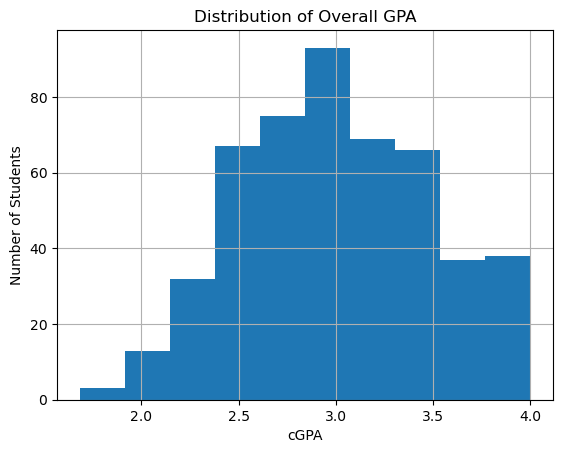

In [11]:
col_y="Overall"
df[col_y].hist()
plt.title(f"Distribution of Overall GPA")
plt.suptitle('')
plt.xlabel("cGPA")
plt.ylabel("Number of Students")
plt.show(

)

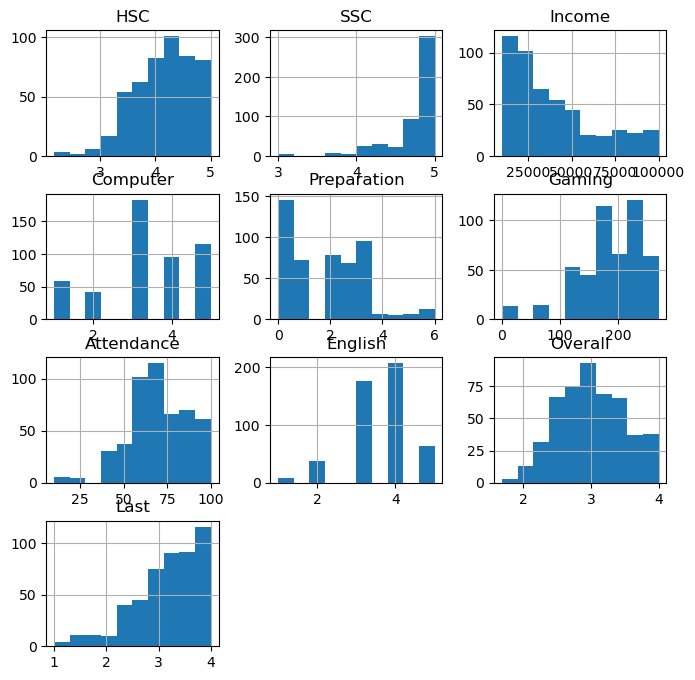

In [14]:
df.hist(figsize=(8,8))
plt.show()

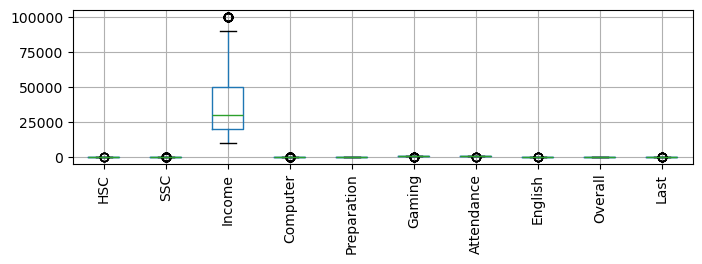

In [15]:
df.boxplot(rot=90, figsize=(8,2))
plt.show()

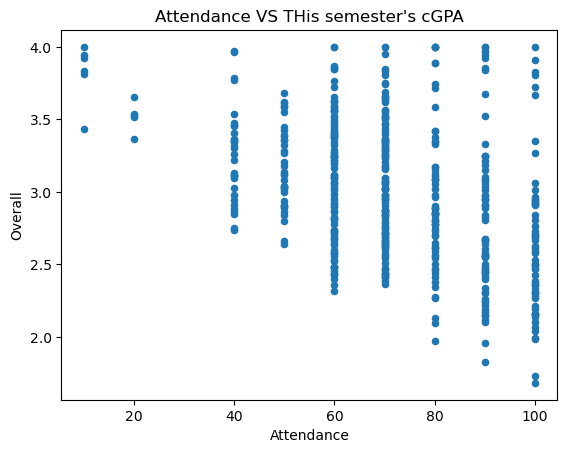

In [17]:
col_x="Attendance"
col_y="Overall"
df.plot(x=col_x, y=col_y, kind='scatter')
plt.title(f"Attendance VS THis semester's cGPA")
plt.suptitle("")
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.show()


In [22]:
col_numeric=df.select_dtypes(include=['float','int']).columns
df_corr=df[col_numeric].corr()
df_corr


,HSC,SSC,Income,Computer,Preparation,Gaming,Attendance,English,Overall,Last
HSC,1.000000,0.365539,-0.047505,-0.062396,0.105688,-0.126918,0.307074,-0.050387,-0.099437,0.243873
SSC,0.365539,1.000000,0.031762,0.008274,-0.010271,-0.094475,0.080594,0.088449,0.029473,0.108512
Income,-0.047505,0.031762,1.000000,0.106456,-0.051836,-0.020496,-0.102459,0.055090,0.103771,0.003122
Computer,-0.062396,0.008274,0.106456,1.000000,0.003181,-0.005926,-0.003420,0.156180,0.301770,0.180024
Preparation,0.105688,-0.010271,-0.051836,0.003181,1.000000,-0.075766,0.311700,-0.082574,-0.108866,0.339781
Gaming,-0.126918,-0.094475,-0.020496,-0.005926,-0.075766,1.000000,-0.201386,0.251182,-0.749650,-0.270765
Attendance,0.307074,0.080594,-0.102459,-0.003420,0.311700,-0.201386,1.000000,-0.066243,-0.411175,0.648784
English,-0.050387,0.088449,0.055090,0.156180,-0.082574,0.251182,-0.066243,1.000000,-0.142039,0.043559
Overall,-0.099437,0.029473,0.103771,0.301770,-0.108866,-0.749650,-0.411175,-0.142039,1.000000,-0.095494
Last,0.243873,0.108512,0.003122,0.180024,0.339781,-0.270765,0.648784,0.043559,-0.095494,1.000000


<Axes: >

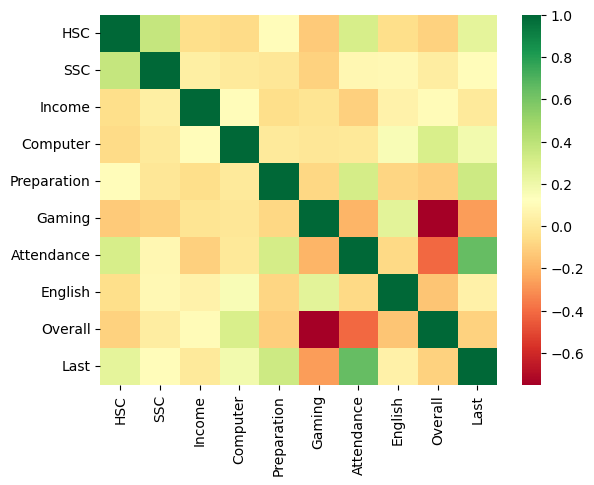

In [23]:
sns.heatmap(df_corr, cmap='RdYlGn')

OBESITY

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly